In [1]:
%matplotlib inline
import cv2
from matplotlib import pyplot as plt
import numpy as np

# Punto 1 (10%)

Lea con OpenCV la imagen "alce.png" que está dentro de la carpeta "res". Conviértala a RGB y luego divídala en cuatro cuadrantes tales que el primer cuadrante muestre el canal rojo y verde (amarillo), el segundo muestre el canal verde y azul (azul cyan), el tercero muestre el canal rojo y azul (Magenta), y el cuarto ningún color (negro).
<br>Debe obtener lo siguiente: </br>

<img src="res/answer_1.png"/>

<b>Nota:</b> La dimensión de la imagen en RGB es (286, 388, 3)

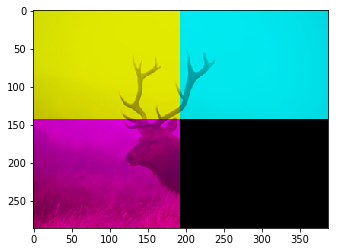

In [2]:
### Escriba su código aquí ###

#Leer la imagen en RGB o escala de grises con una sola línea de código
def img_read(filename, mode = 'color'):
    if(mode == 'color'):   
        return cv2.cvtColor(cv2.imread(filename),cv2.COLOR_BGR2RGB)
    elif(mode=='grayscale' or mode=='greyscale' or mode == 'gray' or mode == 'grey'):
        return cv2.imread(filename, cv2.IMREAD_GRAYSCALE)
    else:
        return None

#Leer la imagen de trabajo
alce = img_read("res/alce.png")

#Dimensiones de los cuadrantes
m_alto = int(alce.shape[0]/2)
m_ancho = int(alce.shape[1]/2)

#Recuadro amarillo
for i in range(m_alto):
    for j in range(m_ancho):
        alce[i, j, 2] = 0;

#Recuadro Cyan
for i in range(m_alto):
    for j in range(m_ancho):
        alce[i, j + m_ancho, 0] = 0;

#Recuadro Magenta
for i in range(m_alto):
    for j in range(m_ancho):
        alce[i + m_alto, j, 1] = 0;

#Recuadro Negro
for i in range(m_alto):
    for j in range(m_ancho):
        alce[i + m_alto, j + m_ancho, 0] = 0;
        alce[i + m_alto, j + m_ancho, 1] = 0;
        alce[i + m_alto, j + m_ancho, 2] = 0;
        
plt.imshow(alce)

---

# Punto 2 (30%)

El monitor de visión artificial, luego de aplicar segmentación para el reconocimiento de etiqueta de una nevera, logró separar la etiqueta correctamente, sin embargo obtuvo la siguiente máscara:

<img src="res/mascara.png"/>

Lea con OpenCV la imagen "nevera.jpg" que está dentro de la carpeta "res". Luego aplique la máscara "mask.jpg" que está dentro de la carpeta "res". Y Obtenga el siguiente resultado:

<img src="res/answer_2.png"/>

<b>Cosas a tener en cuenta:</b>

- CUIDADO con las dimensiones de la imagen y la máscara.
- Si la salida esperada es a color, su salida también lo debe ser.

<b>Recomendación:</b>

- Usar "img.shape", para saber la dimensión de las imágenes.

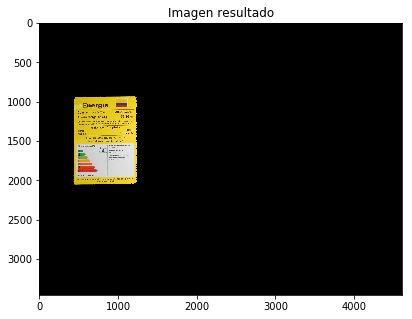

In [3]:
### Escriba su código aquí ###
#Leer la imagen en RGB o escala de grises con una sola línea de código
def img_read(filename, mode = 'color'):
    if(mode == 'color'):   
        return cv2.cvtColor(cv2.imread(filename),cv2.COLOR_BGR2RGB)
    elif(mode=='grayscale' or mode=='greyscale' or mode == 'gray' or mode == 'grey'):
        return cv2.imread(filename, cv2.IMREAD_GRAYSCALE)
    else:
        return None

#Leer la imagen de trabajo
nevera = img_read("res/nevera.jpg")
mask = img_read("res/mask.jpg")
mask = cv2.resize(mask, (nevera.shape[1], nevera.shape[0]))
mask_inverse = (255 - mask)//255
out = cv2.multiply(nevera, mask_inverse)
fig, ax1 = plt.subplots(1,1, figsize=(7, 5))
ax1.set_title('Imagen resultado')
ax1.imshow(out, cmap = plt.cm.gray)

---

# Punto 3 (5%)

Tenemos la siguiente imagen con mucho ruido de sal y pimienta:

<img src="res/ruido.png" width="500"/>

Lea la imagen "ruido.png" dentro de la carpeta "res", y mediante el uso del <b>filtro de mediana</b> con un <b>tamaño de kernel 5</b>, obtenga el siguiente resultado:

<img src="res/answer_3.png"/>

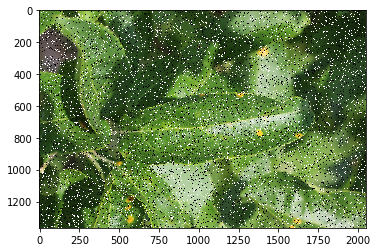

In [4]:
### Escriba su código aquí ###
#Leer la imagen en RGB o escala de grises con una sola línea de código
def img_read(filename, mode = 'color'):
    if(mode == 'color'):   
        return cv2.cvtColor(cv2.imread(filename),cv2.COLOR_BGR2RGB)
    elif(mode=='grayscale' or mode=='greyscale' or mode == 'gray' or mode == 'grey'):
        return cv2.imread(filename, cv2.IMREAD_GRAYSCALE)
    else:
        return None
    
img = img_read('res/ruido.png', 'color')

#Definir tamaño del kernel
k_size = 5

#Aplicar filtro de mediana a la imagen de entrada
resultado = cv2.medianBlur(img, k_size)

#Mostrar el resultado obtenido luego de aplicar el filtro
plt.imshow(resultado)

---

# Punto 4 (10%)

Tenemos la siguiente función, $F=\ln{(X + 1)}+{a}$, donde <b>X</b> es la imagen de entrada y <b>a</b> es una constante. El código de esta función se encuentra en la siguiente celda:


In [5]:
def ln(img, a):
    #Crear copia de la imagen con datos flotantes dado que se normalizarán
    img_copy = img.astype(np.float32)/255
    #A partir de la imagen, generar ln(x + 1)
    res_a = np.log(img_copy + 1)
    #Sumar ln(x + 1) + a
    res = cv2.add(res_a, a)
    #Asegurar que los datos queden entre 0 y 255 y regresar al dato uint8
    res[res < 0 ] = 0
    res = res*255
    res[res > 255] = 255
    res = res.astype(np.uint8)
    
    return res

Aplique la función anterior con <b>a = 0.1</b> a la imagen "dog.png" que se encuentra en la carpeta "res", y obtenga el siguiente resultado:
<img src="res/log.jpg" width="250"/>

#### No se le olvide correr la celda de código donde está la función.

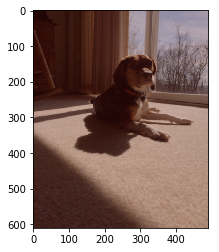

In [6]:
### Escriba su código aquí ###
#Lectura de la imagen original
def img_read(filename, mode = 'color'):
    if(mode == 'color'):   
        return cv2.cvtColor(cv2.imread(filename),cv2.COLOR_BGR2RGB)
    elif(mode=='grayscale' or mode=='greyscale' or mode == 'gray' or mode == 'grey'):
        return cv2.imread(filename, cv2.IMREAD_GRAYSCALE)
    else:
        return None

img = img_read('res/dog.png', 'color')

#Definir valor para 'a'
a = 0.1

#Aplicar función a la imagen original
resultado = ln(img, a)

#Mostrar el resultado obtenido luego de aplicar la función
plt.imshow(resultado)

# Punto 5 (10%)

Tenemos la siguiente imagen, con su respectivo histograma:
<img src="res/original.png" />

Lea la imagen "mont.jpg" dentro de la carpeta "res", y mediante el uso de transformaciones, obtenga el siguiente resultado:
<img src="res/answer_5.png" />

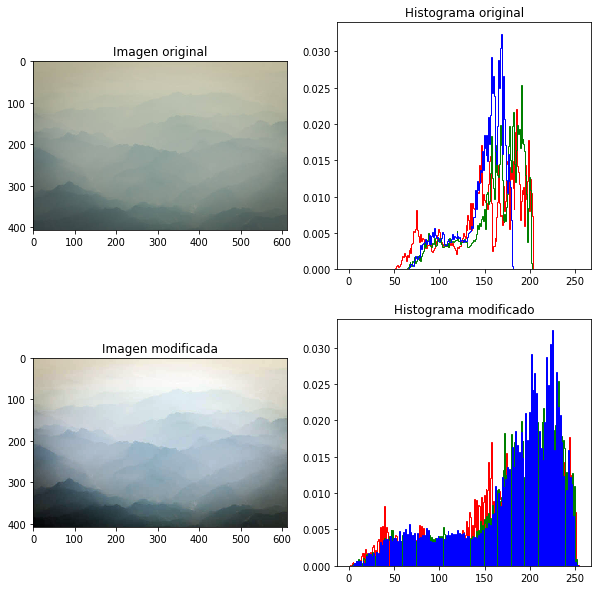

In [7]:
### Escriba su código aquí ###
#Definir la función para aplicar la transformación sobre la imagen RGB
def apply_f_on_rgb(img, f, args):
    
    #Crear una matriz de ceros del tamaño de la imagen de entrada
    res = np.zeros(img.shape, np.uint8)
    #Aplicar la transformación f sobre cada canal del espacio de color RGB
    res[:,:,0] = f(img[:,:,0], *args)
    res[:,:,1] = f(img[:,:,1], *args)
    res[:,:,2] = f(img[:,:,2], *args)
    
    return res

#Definir la función expansión del histograma cuyo parámetro es una imagen
def histogram_expansion(img):
    
    #Crear matriz de ceros del tamaño de la imagen y tipo de dato flotante
    res = np.zeros([img.shape[0], img.shape[1]], dtype=np.float32)
    
    #Extraer el mínimo y el máximo del conjunto de datos
    m = float(np.min(img))
    M = float(np.max(img))
    #Aplicar la función de expansión(normalización) y asegurar datos uint8
    res = (img-m)*255.0/(M-m)
    res = res.astype(np.uint8)
    
    return res

#Leer la imagen de entrada
img = cv2.cvtColor(cv2.imread('res/mont.jpg'), cv2.COLOR_BGR2RGB)

#Aplicar la transformación expansión de histograma sobre la imagen de entrada
res = apply_f_on_rgb(img, histogram_expansion, [])

#Generar un subplot 2x2 para contrastar imágen original con transformada y sus histogramas
fig, arreglo_plots = plt.subplots(2,2, figsize=(10, 10))
colors = ('r','g','b')

arreglo_plots[0,0].set_title('Imagen original')
arreglo_plots[0,0].imshow(img, cmap="gray")
arreglo_plots[0,1].set_title('Histograma original')
for i,col in enumerate(colors):
    img_array_i = img[:,:,i].ravel()
    arreglo_plots[0,1].hist(img_array_i,histtype='step', bins=255, 
                            range=(0.0, 255.0),density=True, color=colors[i])

arreglo_plots[1,0].set_title('Imagen modificada')
arreglo_plots[1,0].imshow(res, cmap="gray")
arreglo_plots[1,1].set_title('Histograma modificado')
for i,col in enumerate(colors):
    img_array_i = res[:,:,i].ravel()
    arreglo_plots[1,1].hist(img_array_i,histtype='step', bins=255, 
                            range=(0.0, 255.0),density=True, color=colors[i])

# Punto 6 (10%)

Tenemos la siguiente imagen:

<img src="res/cebra.jpg" width="500"/>

Lea la imagen "cebra.jpg" dentro de la carpeta "res". Luego, si quisieramos separar las cebras peatonales, con los siguientes canales de color: <b>B del RGB, Z del XYZ, B* del LAB y H del HSV </b>, ¿Cuál sería el mejor canal posible para separar la cebra del fondo?

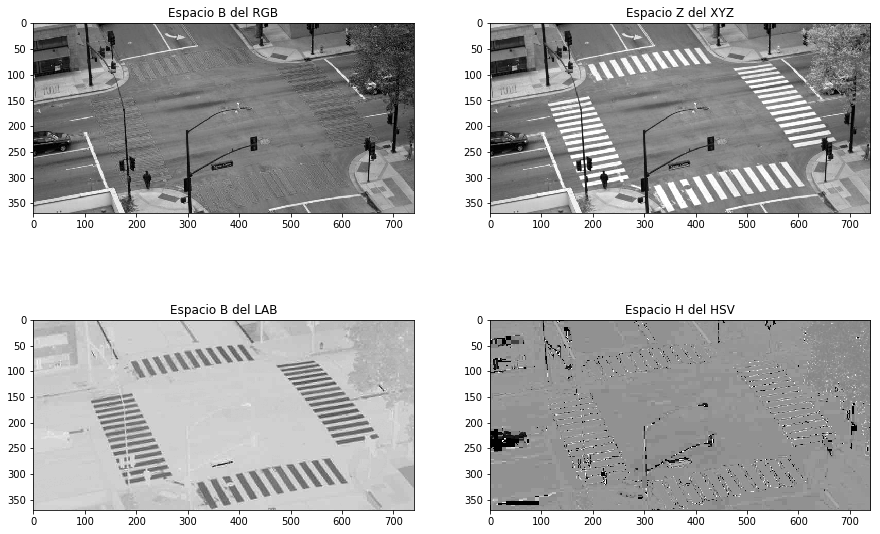

In [8]:
### Escriba su código aquí ###
#Lectura de la imagen original
def img_read(filename, mode = 'color'):
    if(mode == 'color'):   
        return cv2.cvtColor(cv2.imread(filename),cv2.COLOR_BGR2RGB)
    elif(mode=='grayscale' or mode=='greyscale' or mode == 'gray' or mode == 'grey'):
        return cv2.imread(filename, cv2.IMREAD_GRAYSCALE)
    else:
        return None
    
#Espacio B del RGB
img = img_read('res/cebra.jpg', 'color')
img_B = img[:,:,2]

#Espacio Z del XYZ
img_xyz = cv2.cvtColor(img, cv2.COLOR_BGR2XYZ)
img_Z = img_xyz[:,:,2]

#Espacio B del LAB
img_lab  = cv2.cvtColor(img, cv2.COLOR_BGR2LAB)
img_BB = img_lab[:,:,2]

#Espacio H del HSV
img_hsv  = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
img_H = img_hsv[:,:,0]

fig, arreglo_plots = plt.subplots(2,2, figsize=(15, 10))

arreglo_plots[0,0].set_title('Espacio B del RGB')
arreglo_plots[0,0].imshow(img_B, cmap="gray")
arreglo_plots[0,1].set_title('Espacio Z del XYZ')
arreglo_plots[0,1].imshow(img_Z, cmap="gray")
arreglo_plots[1,0].set_title('Espacio B del LAB')
arreglo_plots[1,0].imshow(img_BB, cmap="gray")
arreglo_plots[1,1].set_title('Espacio H del HSV')
arreglo_plots[1,1].imshow(img_H, cmap="gray")

**Respuesta:** El mejor canal posible para separar la cebra del fondo sería el espacio B del canal LAB, pues es en el que se logra una mayor diferenciación de las cebras respecto a las demás componentes de la imagen.

# Punto 7 (10%)

Tenemos la siguiente imagen:

<img src="res/cactus.jpg" width="500"/>

Lea la imagen "cactus.jpg" dentro de la carpeta "res". Luego, si quisieramos separar los cactus del fondo, con los siguientes canales de color: <b>R del RGB, X del XYZ, A del LAB y S del HSV </b>, ¿Cuál sería el mejor canal posible para separar los cactus del fondo?

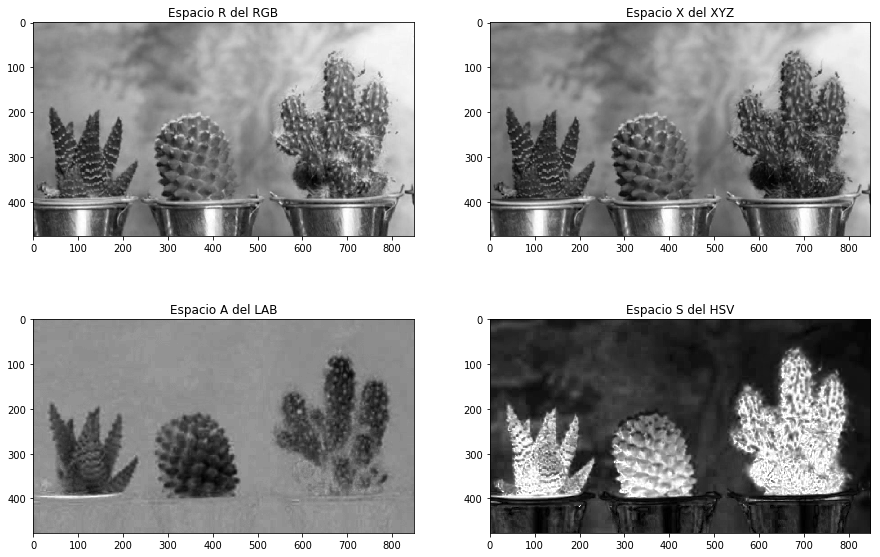

In [9]:
### Escriba su código aquí ###
#Lectura de la imagen original
def img_read(filename, mode = 'color'):
    if(mode == 'color'):   
        return cv2.cvtColor(cv2.imread(filename),cv2.COLOR_BGR2RGB)
    elif(mode=='grayscale' or mode=='greyscale' or mode == 'gray' or mode == 'grey'):
        return cv2.imread(filename, cv2.IMREAD_GRAYSCALE)
    else:
        return None
    
#Espacio R del RGB
img = img_read('res/cactus.jpg', 'color')
img_R = img[:,:,0]

#Espacio X del XYZ
img_xyz = cv2.cvtColor(img, cv2.COLOR_BGR2XYZ)
img_X = img_xyz[:,:,0]

#Espacio A del LAB
img_lab  = cv2.cvtColor(img, cv2.COLOR_BGR2LAB)
img_A = img_lab[:,:,1]

#Espacio S del HSV
img_hsv  = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
img_S = img_hsv[:,:,1]

fig, arreglo_plots = plt.subplots(2,2, figsize=(15, 10))

arreglo_plots[0,0].set_title('Espacio R del RGB')
arreglo_plots[0,0].imshow(img_R, cmap="gray")
arreglo_plots[0,1].set_title('Espacio X del XYZ')
arreglo_plots[0,1].imshow(img_X, cmap="gray")
arreglo_plots[1,0].set_title('Espacio A del LAB')
arreglo_plots[1,0].imshow(img_A, cmap="gray")
arreglo_plots[1,1].set_title('Espacio S del HSV')
arreglo_plots[1,1].imshow(img_S, cmap="gray")

**Respuesta:** El mejor canal posible para separar los cáctus del fondo sería el espacio A del canal LAB, pues es en el que más claramente se diferencian los cáctus del resto de componentes de la imágen. El canal S del espacio HSV también podría ser una buena alternativa, sin embargo, aún logran apreciarse las materas de los cáctus, aunque en una menor intensidad.

# Punto 8 (15%)

Tenemos la siguiente imagen y una máscara:

<img src="res/question_8.png"/>

Lea la imagen "gato.jpg", y la máscara "mascara2.png" dentro de la carpeta "res", y mediante el uso de transformaciones geométricas, obtenga el siguiente resultado:
<img src="res/answer_8.png"/>

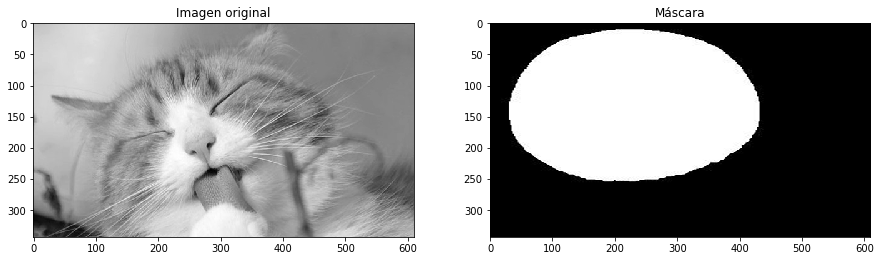

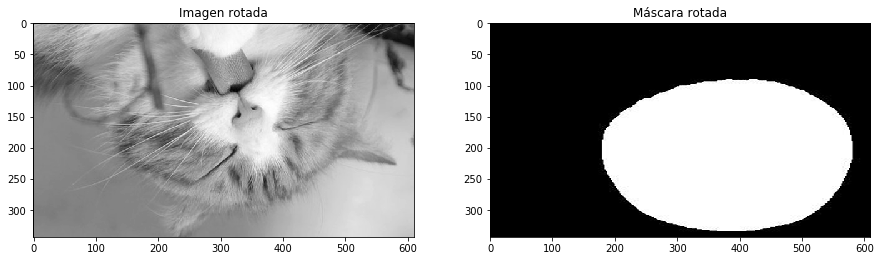

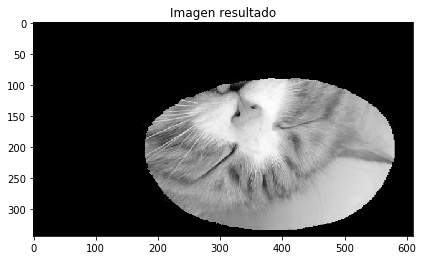

In [10]:
### Escriba su código aquí ###

#Lectura de la imagen original
def img_read(filename, mode = 'color'):
    if(mode == 'color'):   
        return cv2.cvtColor(cv2.imread(filename),cv2.COLOR_BGR2RGB)
    elif(mode=='grayscale' or mode=='greyscale' or mode == 'gray' or mode == 'grey'):
        return cv2.imread(filename, cv2.IMREAD_GRAYSCALE)
    else:
        return None

img = img_read('res/gato.jpg', 'gray')
mask = img_read('res/mascara2.png', 'gray')

#--------------------------------------------------------
#Resize para la máscara
mask = cv2.resize(mask, (img.shape[1], img.shape[0]), interpolation = cv2.INTER_CUBIC).astype(np.uint8)

#--------------------------------------------------------
#Mostrar imagen y máscara originales
fig, arreglo_plots = plt.subplots(1,2, figsize=(15, 15))
arreglo_plots[0].set_title('Imagen original')
arreglo_plots[0].imshow(img,  cmap = plt.cm.gray)
arreglo_plots[1].set_title('Máscara')
arreglo_plots[1].imshow(mask, cmap = plt.cm.gray)
 
#--------------------------------------------------------
#Rotación del gato
#Obtener los datos de filas y columnas de la imagen
filas,columnas = img.shape

#Asignar un ángulo de rotación
theta = 180

#Selección del eje de rotación
rotation_center = ((columnas/2,filas/2))
#rotation_center = ((0,0))

#Con base en el ángulo, utilizar getRotationMatrix2D de cv2
matriz_afin_rot = cv2.getRotationMatrix2D(rotation_center,theta,1)

#Aplicar la matriz obtenida sobre la imagen leída
gato_rotado = cv2.warpAffine(img,matriz_afin_rot,(columnas,filas))

#--------------------------------------------------------
#Rotación de la máscara
#Obtener los datos de filas y columnas de la imagen
filas,columnas = mask.shape
#Asignar un ángulo de rotación
theta = 180

#Selección del eje de rotación
rotation_center = ((columnas/2,filas/2))
#rotation_center = ((0,0))

#Con base en el ángulo, utilizar getRotationMatrix2D de cv2
matriz_afin_rot = cv2.getRotationMatrix2D(rotation_center,theta,1)

#Aplicar la matriz obtenida sobre la imagen leída
mascara_rotada = cv2.warpAffine(mask,matriz_afin_rot,(columnas,filas))

#--------------------------------------------------------
#Figura 1x2 para mostrar imagen y máscaras luego de rotación
fig, arreglo_plots = plt.subplots(1,2, figsize=(15, 15))
arreglo_plots[0].set_title('Imagen rotada')
arreglo_plots[0].imshow(gato_rotado, cmap = plt.cm.gray)
arreglo_plots[1].set_title('Máscara rotada')
arreglo_plots[1].imshow(mascara_rotada, cmap = plt.cm.gray)

#--------------------------------------------------------
#Generar imagen final mediante bitwise_and
out = cv2.bitwise_and(gato_rotado, mascara_rotada)
#out = cv2.warpAffine(out, matriz_afin_rot, (gato_rotado.shape[1], gato_rotado.shape[0]))
fig, ax1 = plt.subplots(1,1, figsize=(6.8, 6.8))
ax1.set_title('Imagen resultado')
ax1.imshow(out, cmap = 'gray')